In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

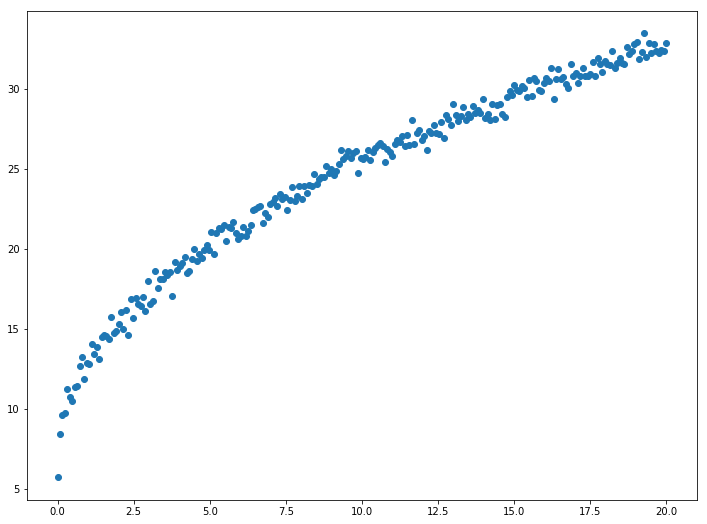

In [8]:
# Simulate data

N = 250
D = 1

X = np.linspace(0, 20, N)
X.shape = (N, D)

y = 6.2 + 4.7*np.sqrt(X) + 2.1*(X**(1.0/3)) + np.random.randn(N, D)*0.5

plt.figure(figsize = (12, 9))
plt.scatter(X, y)

In [9]:
# Functions

def sigmoid(H):
    return 1 / (1 + np.exp(-H))

def ReLU(X):
    return X * (X > 0)

def feed_forward(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
    Z1 = np.tanh(np.matmul(X, W1) + b1)
    Z2 = sigmoid(np.matmul(Z1, W2) + b2)
    Z3 = np.tanh(np.matmul(Z2, W3) + b3)
    Z4 = sigmoid(np.matmul(Z3, W4) + b4)
    y_hat = np.matmul(Z4, W5) + b5
    return Z1, Z2, Z3, Z4, y_hat

def OLS(y, y_hat):
    return np.matmul((y - y_hat).T, y - y_hat)[0, 0]

def r_squared(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

In [38]:
# Build the model

Q = 4
R = 4
S = 4
T = 4
K = 1

W1 = np.random.randn(D, Q)
b1 = np.random.randn(Q)
W2 = np.random.randn(Q, R)
b2 = np.random.randn(R)
W3 = np.random.randn(R, S)
b3 = np.random.randn(S)
W4 = np.random.randn(S, T)
b4 = np.random.randn(T)
W5 = np.random.randn(T, K)
b5 = np.random.randn(K)

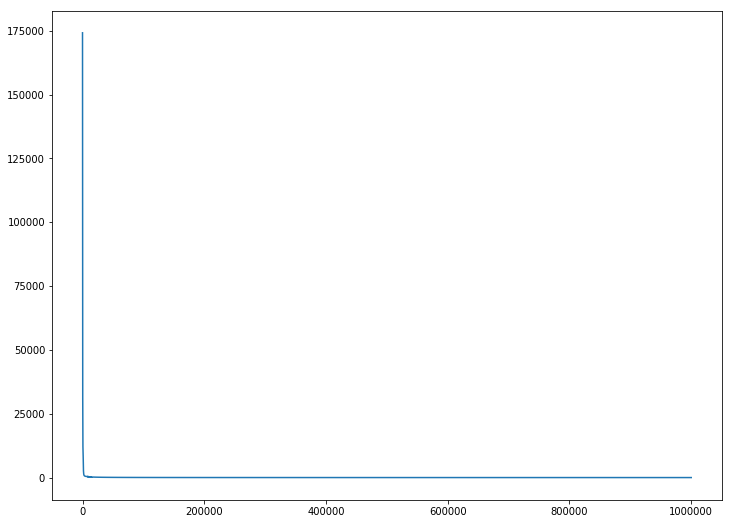

In [39]:
# Train the model

J = []
eta = 2e-6
epochs = int(1e6)

for t in xrange(epochs):
    Z1, Z2, Z3, Z4, y_hat = feed_forward(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
    J.append(OLS(y, y_hat))
    
    dH5 = y_hat - y
    dW5 = np.matmul(Z4.T, dH5)
    W5 -= eta * dW5
    b5 -= eta * dW5.sum(axis = 0)
    
    dZ4 = np.matmul(dH5, W5.T)
    dH4 = dZ4 * Z4 * (1 - Z4)
    dW4 = np.matmul(Z3.T, dH4)
    W4 -= eta * dW4
    b4 -= eta * dW4.sum(axis = 0)
    
    dZ3 = np.matmul(dH4, W4.T)
    dH3 = dZ3 * (1 - Z3*Z3)
    dW3 = np.matmul(Z2.T, dH3)
    W3 -= eta * dW3
    b3 -= eta * dW3.sum(axis = 0)
    
    dZ2 = np.matmul(dH3, W3.T)
    dH2 = dZ2 * Z2 * (1 - Z2)
    dW2 = np.matmul(Z1.T, dH2)
    W2 -= eta * dW2
    b2 -= eta * dW2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2, W2.T)
    dH1 = dZ1 * (1 - Z1*Z1)
    dW1 = np.matmul(X.T, dH1)
    W1 -= eta * dW1
    b1 -= eta * dW1.sum(axis = 0)
    
plt.figure(figsize = (12, 9))
plt.plot(J)

R-squared: 0.993220083208


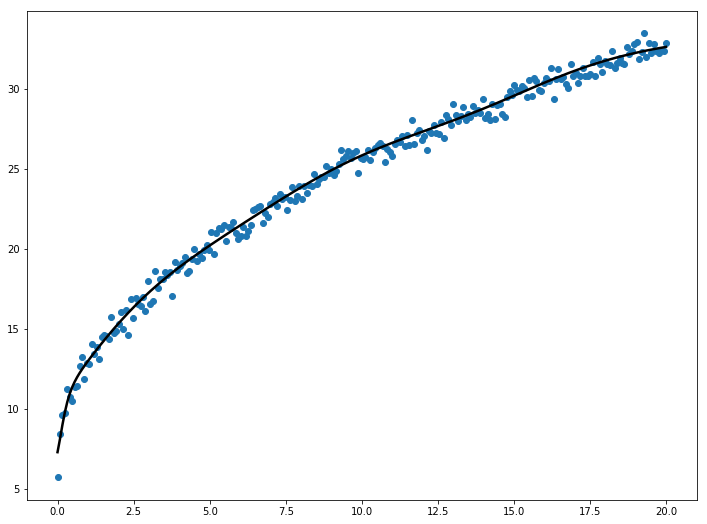

In [40]:
# Visualze the model fit and report R-Squared

plt.figure(figsize = (12, 9))
plt.scatter(X, y)
plt.plot(X, y_hat, color = "black", linewidth = 2.5)

print("R-squared: {}".format(r_squared(y, y_hat)))